# Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 


# Details about the data
Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [14]:
# import dataset
toyo=pd.read_csv('Toyoto_Corrola.csv')
toyo

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [15]:
#EDA
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [17]:
toyo3=toyo.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo3

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [13]:
toyo3[toyo3.duplicated()]

,Price,Age,Doors,Gears
28,16950,28,3,5
33,14950,26,3,5
36,15950,25,3,5
42,13950,22,3,5
50,17950,22,5,5
...,...,...,...,...
1423,7950,80,3,5
1424,7750,73,3,5
1427,8950,71,3,5
1433,8500,71,3,5


In [18]:
toyo4=toyo3.drop_duplicates().reset_index(drop=True)
toyo4

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [19]:
toyo4.describe()

,Id,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,416.476890,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,361.750000,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,721.500000,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [20]:
toyo4.corr()

,Id,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


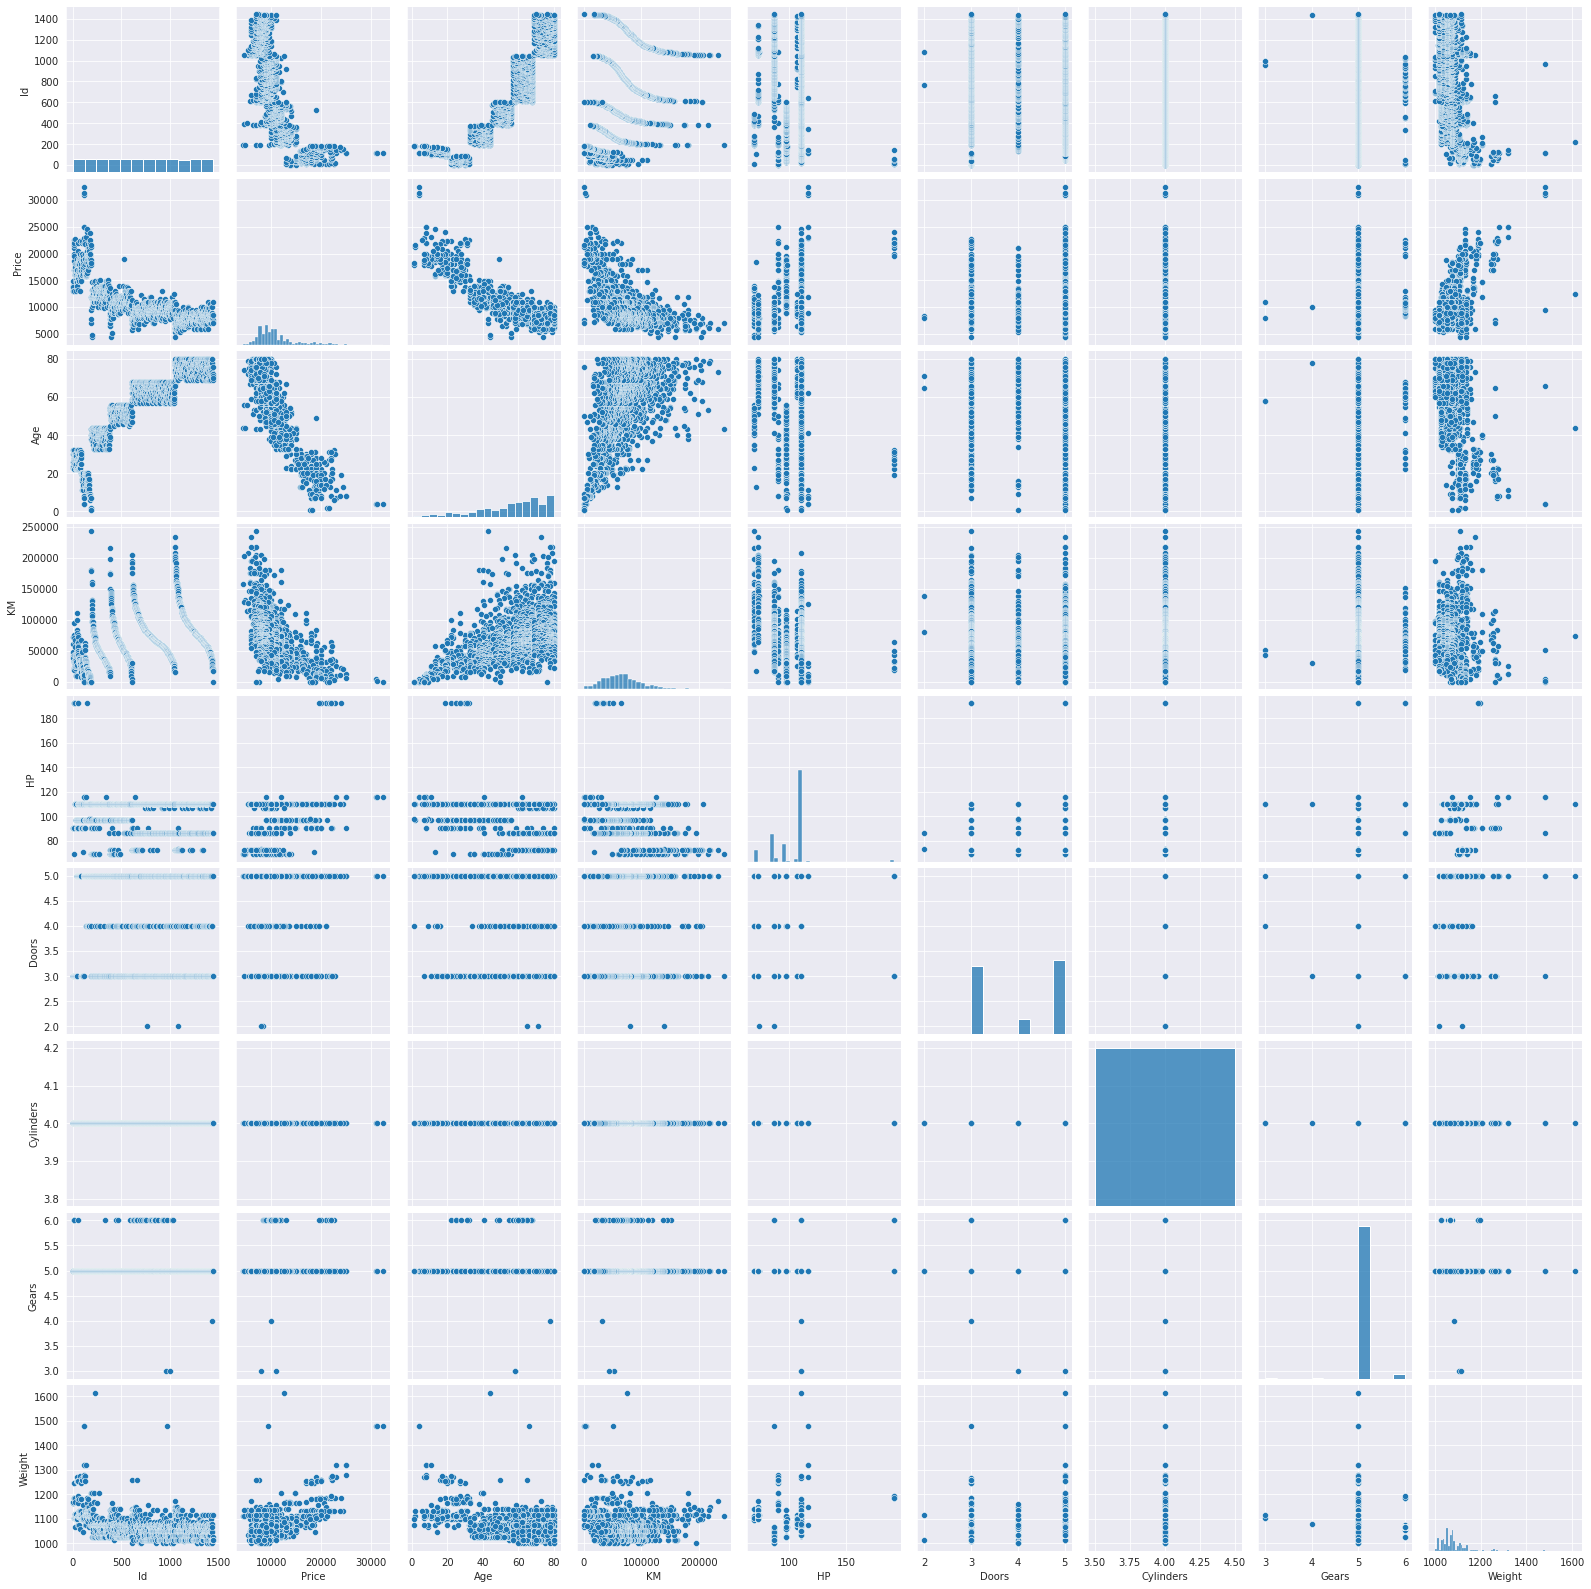

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo4)

In [26]:
#Model Building
model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=toyo4).fit()

In [27]:
#Model Testing
# Finding Coefficient parameters
model.params

Intercept   -6984.373566
Age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [28]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept    -5.323309
 Age         -46.728942
 KM          -16.542560
 HP           10.842418
 Doors        -0.242055
 Gears         3.152234
 Weight       22.446903
 dtype: float64, Intercept    0.00000
 Age          0.00000
 KM           0.00000
 HP           0.00000
 Doors        0.80877
 Gears        0.00165
 Weight       0.00000
 dtype: float64)

In [29]:
# Finding rsquared values
model.rsquared , model.rsquared_adj   # Model accuracy is 86.17%

(0.8628024511073656, 0.8622263942190831)

In [30]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues

In [32]:
slr_d=smf.ols('Price~Doors',data=toyo4).fit()
slr_d.tvalues , slr_d.pvalues # Doors has significant pvalue

(Intercept    19.258097
 Doors         7.141657
 dtype: float64, Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [36]:
#Model Validation Techniques
#Two Techniques: 1. Collinearity Check & 2. Residual Analysis
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+Doors+Gears+Weight',data=toyo4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+Doors+Gears+Weight',data=toyo4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+Doors+Gears+Weight',data=toyo4).fit().rsquared
vif_HP=1/(1-rsq_HP)


rsq_DR=smf.ols('Doors~Age+KM+HP+Gears+Weight',data=toyo4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+Doors+Weight',data=toyo4).fit().rsquared
vif_GR=1/(1-rsq_GR)



rsq_WT=smf.ols('Weight~Age+KM+HP+Doors+Gears',data=toyo4).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','Doors','Gears','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_DR,vif_GR,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Gears,1.096501
5,Weight,1.508041


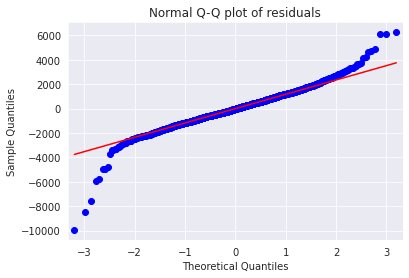

In [37]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [38]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 147, 523])]

In [39]:
list(np.where(model.resid<-6000))

[array([221, 601, 960])]

In [40]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

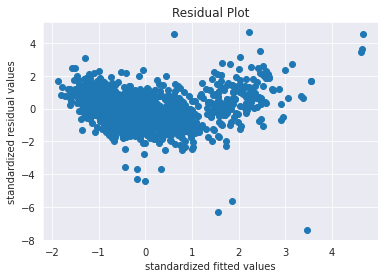

In [41]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

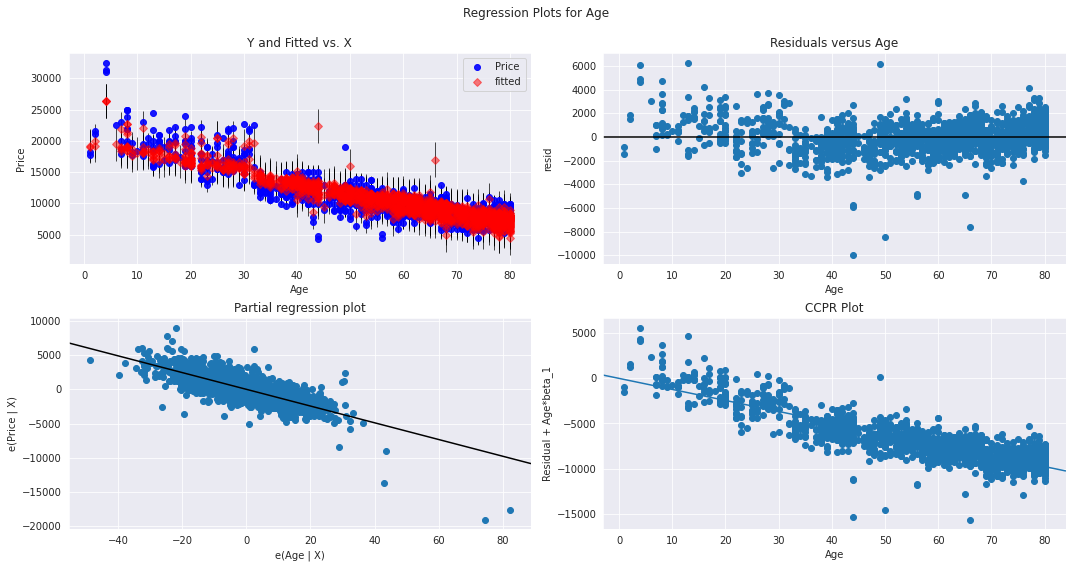

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

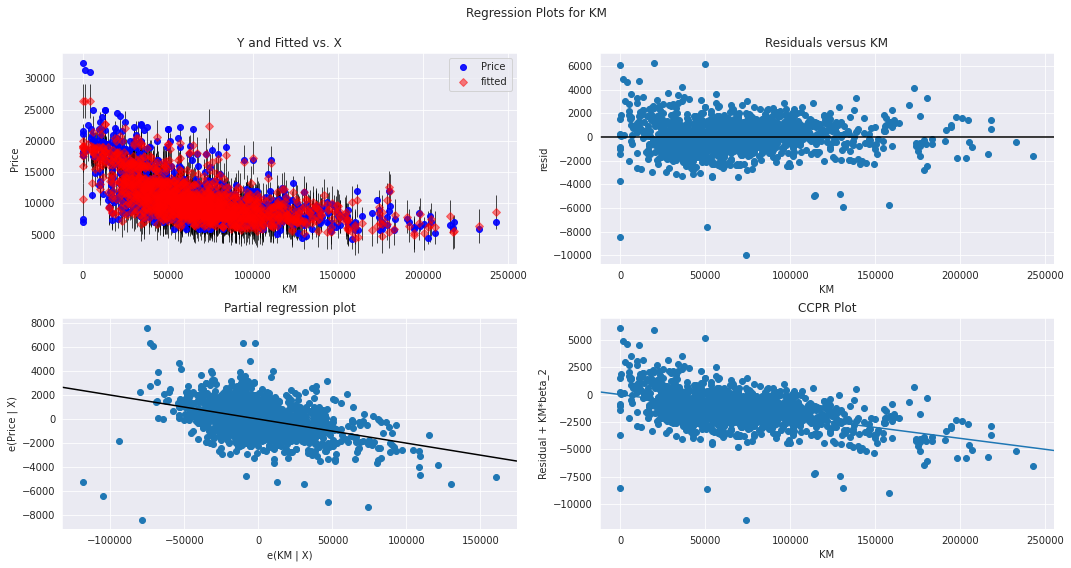

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

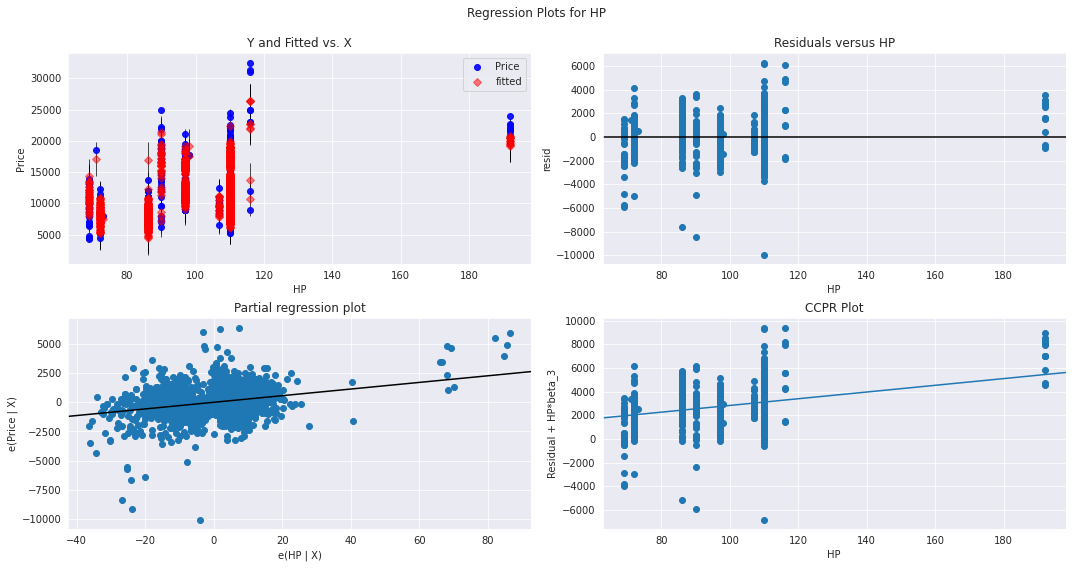

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

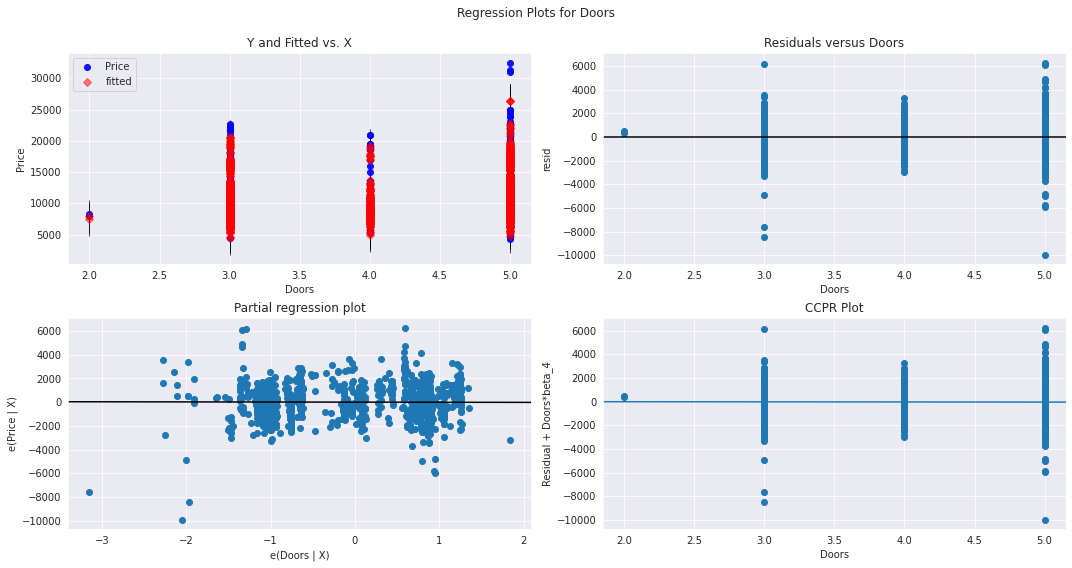

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

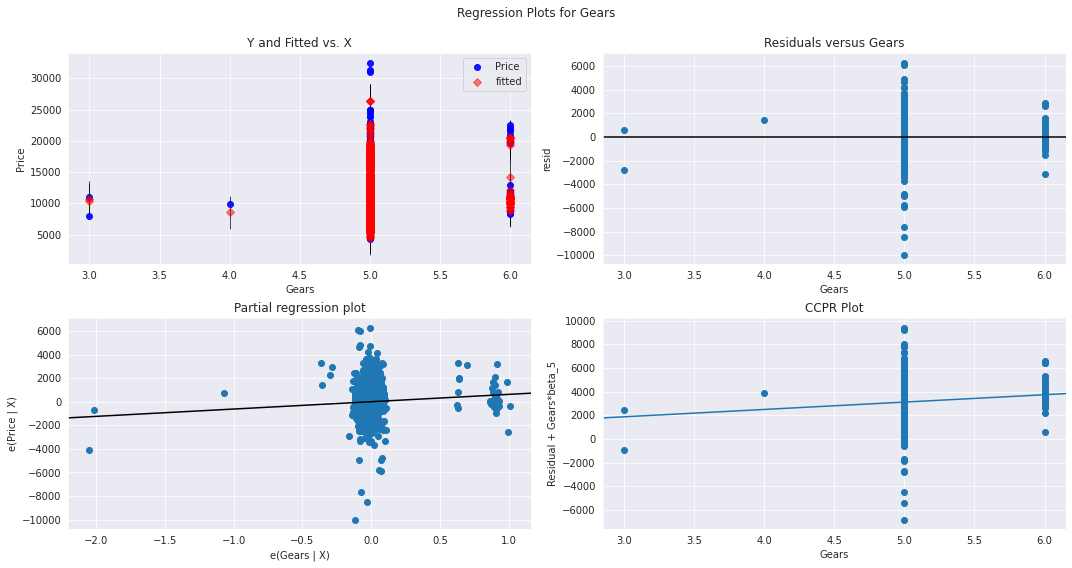

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

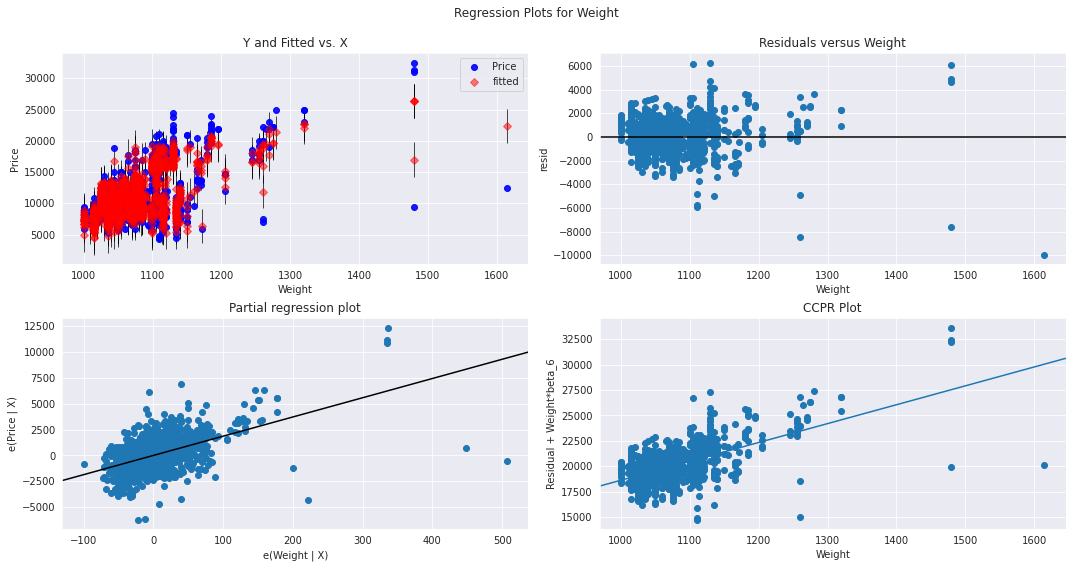

In [48]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [49]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Two Techniques : 1. Cook's Distance & 2. Leverage value
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([4.85399077e-03, 2.82955457e-03, 3.50120975e-03, ...,
       4.52184726e-06, 8.11240017e-04, 1.20365570e-02])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


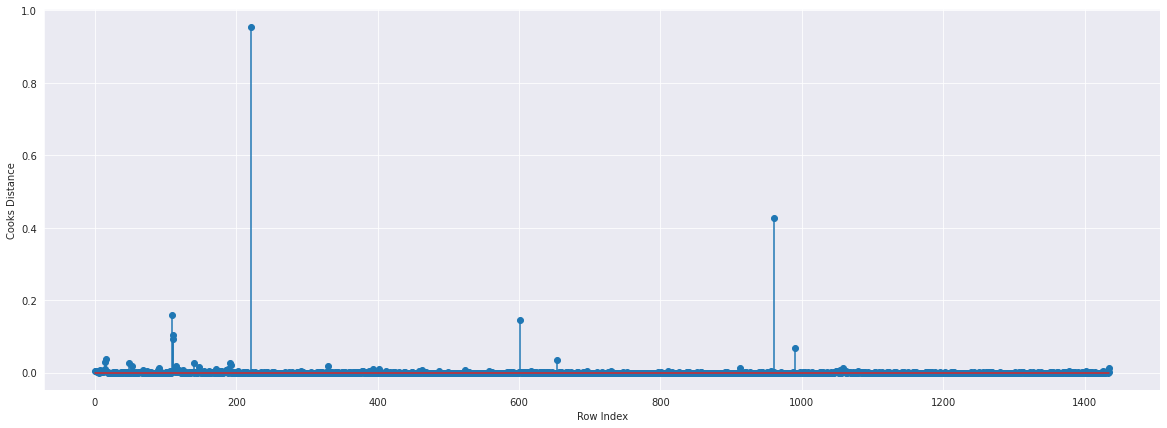

In [50]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyo4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [51]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(221, 0.9553151438695265)

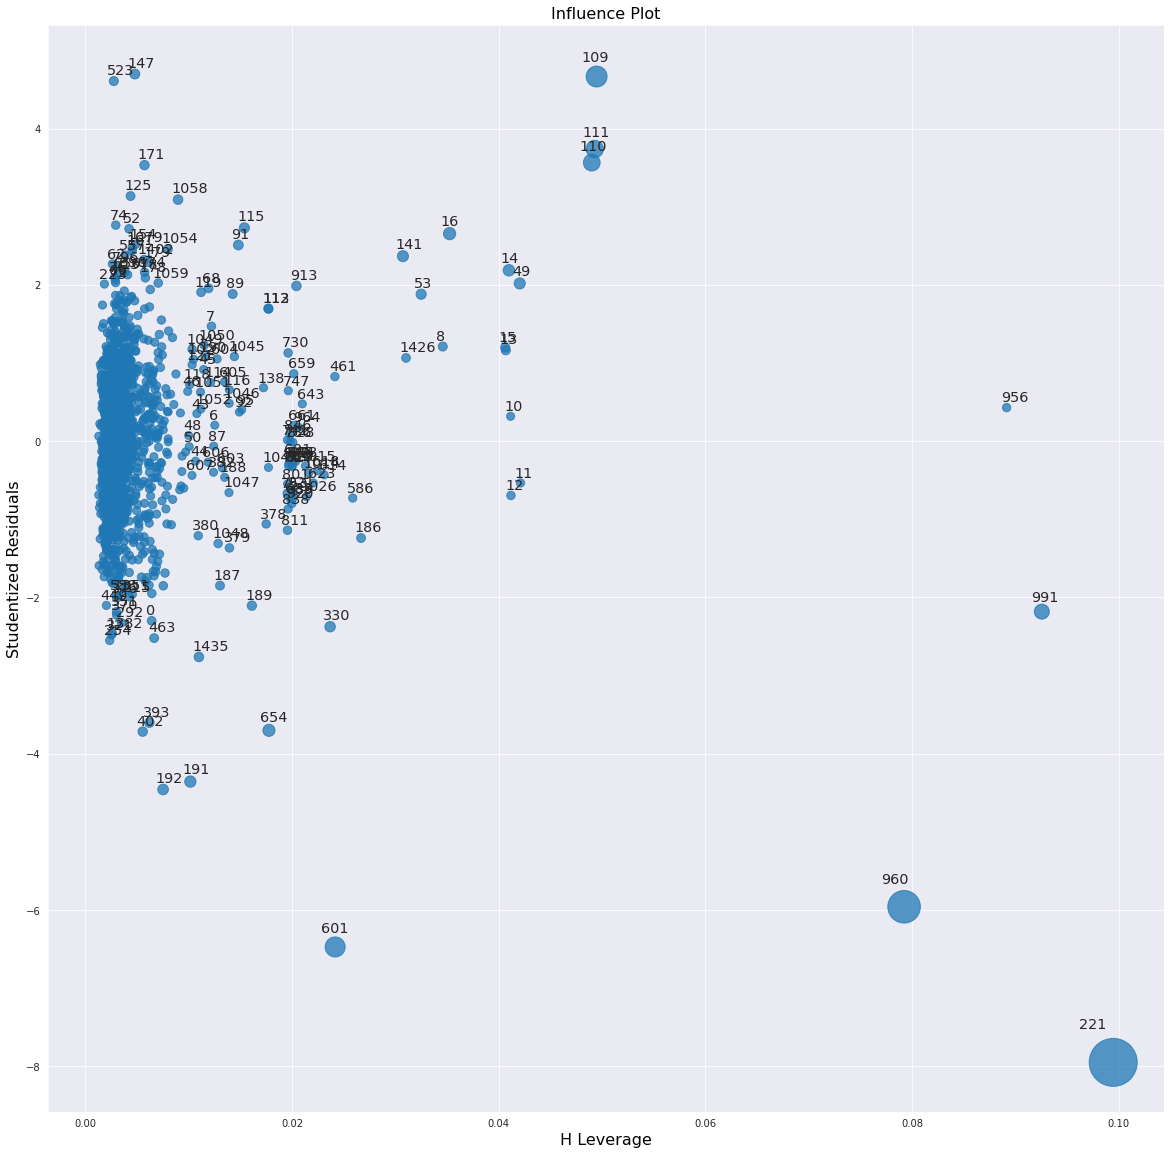

In [52]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [53]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyo4.shape[1]
n=toyo4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.02298050139275766

In [54]:
toyo4[toyo4.index.isin([80])] 

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,20019,110,5,4,5,1180


In [55]:
#Improving the Model
# Creating a copy of data so that original dataset is not affected
toyo_new=toyo4.copy()
toyo_new

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [56]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo5=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo5

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [59]:
#Model Deletion Diagnostics and Final Model
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=toyo5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5
else:
    final_model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=toyo5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8771420137832643


In [60]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=toyo5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=toyo5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8771420137832643


In [61]:
final_model.rsquared

0.8771420137832643

In [62]:
toyo5

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1428,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1429,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1430,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [63]:
#Model Predictions
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [64]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14415.301553
dtype: float64

In [65]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo5)
pred_y

0       16930.025638
1       16345.762060
2       16934.634930
3       16564.738473
4       16439.272505
            ...     
1427     8885.791207
1428     8343.574121
1429     8502.394729
1430     8618.798760
1431    11115.053003
Length: 1432, dtype: float64